In [1]:
import tensorflow as tf
import json
import tensorflow_datasets as tfds

In [5]:
#First let set up some parameters

TRAINING_SIZE =20000

VOCAB_SIZE = 10000

MAX_LENGTH = 32

EMBEDDING_DIM = 16

# the sarcasm data have 27000, we will train 20000 and validate the rest

In [ ]:
with open ('D://Coursera//NLP with tensorflow//sarcasm.json','r') as f:
    datastore = json.load(f)

#create an array for sentences and label and iterate each
sentences = []
labels =[]


for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [11]:
# to get the training and testing label, we will use slicing
training_sentences = sentences[0: TRAINING_SIZE]
testing_sentences = sentences[TRAINING_SIZE:]
training_labels = labels[0:TRAINING_SIZE]
testing_labels = labels[TRAINING_SIZE:]

In [13]:
#Vectorize the layer and adapting to the sentences
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens = VOCAB_SIZE,
    output_sequence_length = MAX_LENGTH)

vectorize_layer.adapt(training_sentences)

#Creating the sequences and they are already post padded
train_sequence = vectorize_layer(training_sentences)
test_sequence = vectorize_layer(testing_sentences)

#create dataset put together the sequence and the labels.

train_dataset_vectorize = tf.data.Dataset.from_tensor_slices((train_sequence, training_labels))
test_dataset_vectorize = tf.data.Dataset.from_tensor_slices(
    (test_sequence,testing_labels))



In [14]:
#Perform cache, shuffle, prefetch and batch to finalise the dataset and avoid
# any generalisation

SHUFFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE
BATCH_SIZE = 32

train_dataset_final = (train_dataset_vectorize
                       .cache()
                       .shuffle(SHUFFFLE_BUFFER_SIZE)
                       .prefetch(PREFETCH_BUFFER_SIZE)
                       .batch(BATCH_SIZE))

test_dataset_final = (test_dataset_vectorize
                      .cache()
                      .prefetch(PREFETCH_BUFFER_SIZE)
                      .batch(BATCH_SIZE))

NEURAL NETWORK

In [15]:
#
model = tf.keras.Sequential([
    tf.keras.Input(shape=(MAX_LENGTH,)),
    tf.keras.layers.Embedding(VOCAB_SIZE,EMBEDDING_DIM),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#compile it with binary cross entropy as well are classifying 2 different classes

model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 32, 16)         │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,109 (625.43 KB)

 Trainable params: 160,109 (625.43 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
num_epochs = 30

history = model.fit(train_dataset_final,epochs=num_epochs,
                    validation_data = test_dataset_final,verbose=2)

Epoch 1/30
625/625 - 3s - 5ms/step - accuracy: 0.6489 - loss: 0.6259 - val_accuracy: 0.7955 - val_loss: 0.5028
Epoch 2/30
625/625 - 1s - 2ms/step - accuracy: 0.8318 - loss: 0.4103 - val_accuracy: 0.8316 - val_loss: 0.3935
Epoch 3/30
625/625 - 1s - 2ms/step - accuracy: 0.8727 - loss: 0.3175 - val_accuracy: 0.8351 - val_loss: 0.3718
Epoch 4/30
625/625 - 1s - 2ms/step - accuracy: 0.8931 - loss: 0.2691 - val_accuracy: 0.8514 - val_loss: 0.3465
Epoch 5/30
625/625 - 1s - 2ms/step - accuracy: 0.9121 - loss: 0.2305 - val_accuracy: 0.8509 - val_loss: 0.3462
Epoch 6/30
625/625 - 1s - 2ms/step - accuracy: 0.9227 - loss: 0.2043 - val_accuracy: 0.8498 - val_loss: 0.3539
Epoch 7/30
625/625 - 1s - 2ms/step - accuracy: 0.9337 - loss: 0.1788 - val_accuracy: 0.8477 - val_loss: 0.3706
Epoch 8/30
625/625 - 1s - 2ms/step - accuracy: 0.9415 - loss: 0.1616 - val_accuracy: 0.8515 - val_loss: 0.3789
Epoch 9/30
625/625 - 1s - 2ms/step - accuracy: 0.9453 - loss: 0.1479 - val_accuracy: 0.8465 - val_loss: 0.4039
E

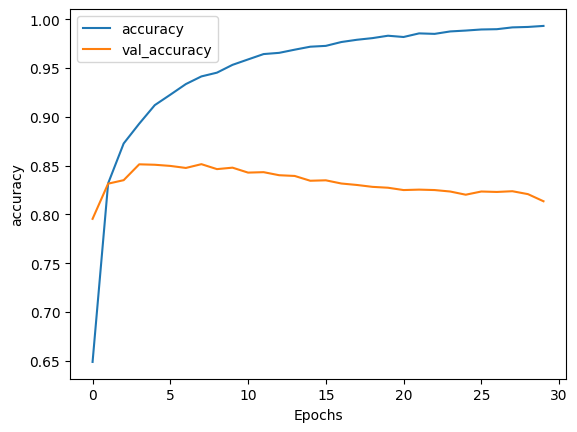

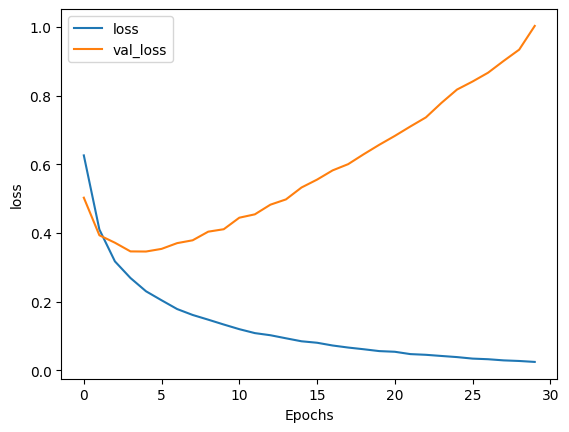

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history, "loss")

In [ ]:
# The graph 1 -  the accuracy increase nicely and validation accuracy is 
# drop down a bit

# In graph 2 -  the validation loss increase heavily

This above result is shown in such way because as the number of accurate prediction increases over the time, the confidence per prediction decreases. This is very frequent with text data. And to overcome from this, we can tweak the hyperparameter like MAX_LENGTH, EMBEDDING_SIZE etc.